In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.data.shape, diabetes.target.shape)


(442, 10) (442,)


In [3]:
diabetes.data[0:3] #bmi

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [4]:
diabetes.target[:3] #당수치

array([151.,  75., 141.])

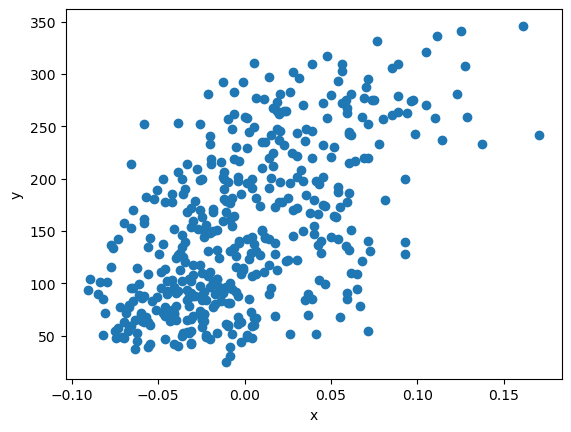

In [7]:
#bmi와 당수치의 상관관계
import matplotlib.pyplot as plt

plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x') #bmi
plt.ylabel('y') #당수치
plt.show()

In [18]:
X = diabetes.data[:, 2]
y = diabetes.target

In [19]:
class Model:
    def __init__(self):
        self.w = 1.0 #가중치 초기화
        self.b = 1.0 #편향 초기화

    def forward(self, x):
        y_hat = x * self.w + self.b
        return y_hat

    def backward(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100):
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                #순전파
                y_hat = self.forward(x_i)
                #오차 계산
                err = -(y_i - y_hat)
                #역전파
                w_grad, b_grad = self.backward(x_i, err)
                self.w -= w_grad #가중치 수정
                self.b -= b_grad #절편 수정

            print('epoch:' + str(i+1) + ',error:' + str(err) + ',w:' + str(w_grad) + 
                ',b:' + str(b_grad))

In [20]:
model = Model()
model.fit(X, y)

epoch:1,error:97.992641777963,w:-7.156432293026746,b:97.992641777963
epoch:2,error:74.35088978164467,w:-5.4298679879889935,b:74.35088978164467
epoch:3,error:65.88050094558986,w:-4.811272927166092,b:65.88050094558986
epoch:4,error:62.845722176015684,w:-4.589642114946713,b:62.845722176015684
epoch:5,error:61.75841882329888,w:-4.510236021953222,b:61.75841882329888
epoch:6,error:61.36885876947157,w:-4.481786333295987,b:61.36885876947157
epoch:7,error:61.22928683201846,w:-4.471593352453069,b:61.22928683201846
epoch:8,error:61.179280868796525,w:-4.467941401821344,b:61.179280868796525
epoch:9,error:61.16136468590632,w:-4.46663297756135,b:61.16136468590632
epoch:10,error:61.15494565928091,w:-4.466164194103752,b:61.15494565928091
epoch:11,error:61.15264584446703,w:-4.4659962379317015,b:61.15264584446703
epoch:12,error:61.15182186468206,w:-4.4659360624385736,b:61.15182186468206
epoch:13,error:61.15152664844041,w:-4.465914502707078,b:61.15152664844041
epoch:14,error:61.151420878091486,w:-4.465906

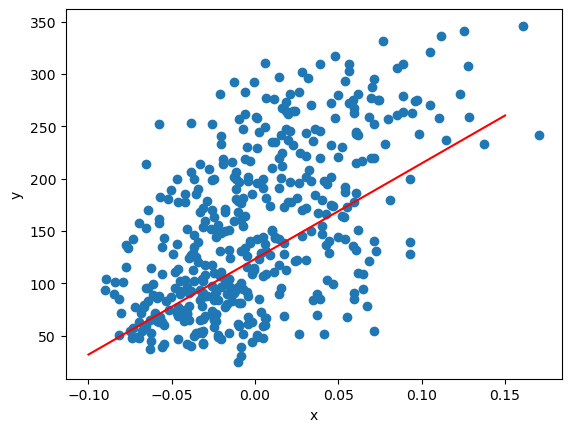

In [21]:
plt.scatter(X, y)
pt1 = (-0.1, -0.1 * model.w + model.b)
pt2 = (0.15, 0.15 * model.w + model.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], c='r') #회귀선
plt.xlabel('x') #bmi
plt.ylabel('y') #당수치
plt.show()